In [98]:
import pandas as pd
import os
import itertools
import operator

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?


#Merge 12 months data inro single data frame

In [99]:

df= pd.read_csv(r'C:\Users\praja\Documents\Sales data\Sales_January_2019.csv')


In [100]:
all_months_data = pd.DataFrame()

for file in os.listdir(r'C:\Users\praja\Documents\Sales data'):
    if file.endswith(".csv"):
        df= pd.read_csv(file)
        all_months_data = pd.concat([all_months_data,df])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [101]:
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,4,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,4,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,4,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1


In [102]:
#cleanup the data
#.remove the NAN values
nan_df= all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()

all_months_data.dropna(how='all')

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,4,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,4,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,4,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1
5,4,04/29/19 13:03,176562,11.95,USB-C Charging Cable,"381 Wilson St, San Francisco, CA 94016",1
6,4,04/02/19 07:46,176563,99.99,Bose SoundSport Headphones,"668 Center St, Seattle, WA 98101",1
7,4,04/12/19 10:58,176564,11.95,USB-C Charging Cable,"790 Ridge St, Atlanta, GA 30301",1
8,4,04/24/19 10:38,176565,1700,Macbook Pro Laptop,"915 Willow St, San Francisco, CA 94016",1
9,4,04/08/19 14:05,176566,11.99,Wired Headphones,"83 7th St, Boston, MA 02215",1


In [103]:
all_months_data.dropna(inplace =True)


In [104]:
#Insert additional months
#1. Month column

all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data.head()


,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,04,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,04,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,04,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,04,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,04,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1


In [105]:
#convert Month column to int
# all_months_data['Month']=all_months_data['Month'].astype('int32') This results in error as heades from all csv are copied
#so need to remove the 'or' from dataframe

all_months_data =all_months_data[all_months_data['Month'].str[0:2]!='Or']
all_months_data.head()


,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,04,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,04,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,04,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,04,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,04,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1


In [96]:
#export all data to csv
all_months_data.to_csv('all_data.csv', index=False)


In [106]:
#month column datatype chnaged to int
all_months_data['Month']=all_months_data['Month'].astype('int32') 

In [107]:
#2. add sales columns
#Quantity Ordered - convert to int
#Price Each - convert to int
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] =pd.to_numeric(all_months_data['Price Each'])


In [108]:
#to add sales colums. sales= Quantity Ordered *Price Each
all_months_data ['sales']=all_months_data['Quantity Ordered']*all_months_data['Price Each']
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales
0,4,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90
1,4,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99
2,4,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00
3,4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99
4,4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99


In [109]:
#what was the bsest month for sales? How much was earned that month?

results = all_months_data.groupby('Month').sum()


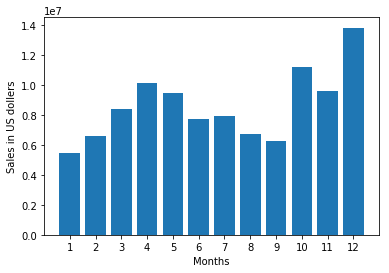

In [111]:
import matplotlib.pyplot as plt
months =range(1,13)

plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel('Sales in US dollers')
plt.xlabel('Months')
plt.show()


In [112]:
# What city sold the most product?

#1. create a column city 
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_months_data['City'] =all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City
0,4,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX)
1,4,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA)
2,4,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA)
3,4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)
4,4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)


In [113]:
city_Sales = all_months_data.groupby('City').sum()
city_Sales.sort_values(by='sales', ascending=False)

,Month,Price Each,Quantity Ordered,sales
City,,,,
San Francisco(CA),946560,2.463439e+07,150717,2.478661e+07
Los Angeles(CA),624975,1.626431e+07,99867,1.635771e+07
New York City(NY),527223,1.390611e+07,83796,1.399295e+07
Boston(MA),423336,1.091223e+07,67584,1.098493e+07
Atlanta(GA),314382,8.339725e+06,49806,8.386496e+06
Dallas(TX),313860,8.257883e+06,50190,8.303926e+06
Seattle(WA),314823,8.199888e+06,49659,8.243266e+06
Portland(OR),211863,5.581675e+06,33909,5.612197e+06
Austin(TX),209487,5.429621e+06,33459,5.458745e+06


In [114]:
# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

In [115]:
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City
0,4,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX)
1,4,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA)
2,4,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA)
3,4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)
4,4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)


In [116]:
# create new column 'hour' from the order date
all_months_data['hour']= all_months_data['Order Date'].dt.hour


all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City,hour
0,4,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX),8
1,4,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA),22
2,4,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA),14
3,4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),14
4,4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),9


In [117]:
all_months_data.groupby(['hour']).count()['Order ID']  # this gives number of orders placed each hour of the date

hour
0     11730
1      7050
2      3729
3      2493
4      2562
5      3963
6      7446
7     12033
8     18768
9     26244
10    32832
11    37233
12    37761
13    36387
14    32952
15    30525
16    31152
17    32697
18    36840
19    38715
20    36684
21    32763
22    26466
23    18825
Name: Order ID, dtype: int64

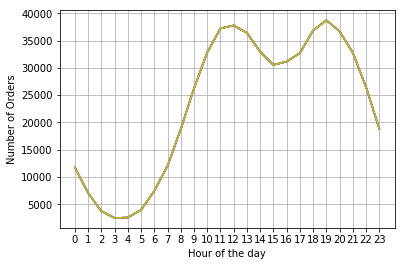

In [118]:
# preset the data into graphical way

hours = [hour for hour , df in all_months_data.groupby('hour')]
plt.plot(hours, all_months_data.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour of the day')
plt.ylabel('Number of Orders')
plt.show()

In [119]:
#4. - What products are most often sold together?

#all_months_data.groupby(['Product'])

#Create a datafrme to copy call the dupliate order ids as it indeicaes that multiple products were ordered in the same order.

df_duplicate_orderids= all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

In [120]:
df_duplicate_orderids.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City,hour
0,4,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX),8
1,4,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA),22
2,4,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA),14
3,4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),14
4,4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),9


In [121]:
df_duplicate_orderids['grouped_products']=df_duplicate_orderids.groupby('Order ID')['Product'].transform(lambda x:','.join(x))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
df_duplicate_orderids.head()

#now we have product grouped together but the oerdre ids are duplicated so same product id is appreading agai ang agin.
# we need to remove the duplicate order ids now

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City,hour,grouped_products
0,4,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX),8,"USB-C Charging Cable,USB-C Charging Cable"
1,4,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA),22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,4,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA),14,"Google Phone,Wired Headphones,Google Phone,Wir..."
3,4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),9,"Wired Headphones,Wired Headphones"


In [84]:
df_duplicate_orderids=df_duplicate_orderids[['Order ID','grouped_products']].drop_duplicates()

In [123]:
df_duplicate_orderids.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City,hour,grouped_products
0,4,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX),8,"USB-C Charging Cable,USB-C Charging Cable"
1,4,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA),22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,4,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA),14,"Google Phone,Wired Headphones,Google Phone,Wir..."
3,4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),9,"Wired Headphones,Wired Headphones"


In [136]:
from itertools import combinations
from collections import Counter

count= Counter()

for row in df_duplicate_orderids['grouped_products']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'), 4379),
 (('Lightning Charging Cable', 'iPhone', 'Lightning Charging Cable'), 4358),
 (('iPhone', 'Lightning Charging Cable', 'iPhone'), 4349),
 (('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable'), 4309),
 (('USB-C Charging Cable', 'Google Phone', 'USB-C Charging Cable'), 4308),
 (('iPhone', 'iPhone', 'Lightning Charging Cable'), 4292),
 (('Google Phone', 'USB-C Charging Cable', 'Google Phone'), 4280),
 (('Google Phone', 'Google Phone', 'USB-C Charging Cable'), 4232),
 (('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 2453),
 (('iPhone', 'Wired Headphones', 'iPhone'), 2040)]

In [ ]:
#5. What product sold the most? Why do you think it sold the most?

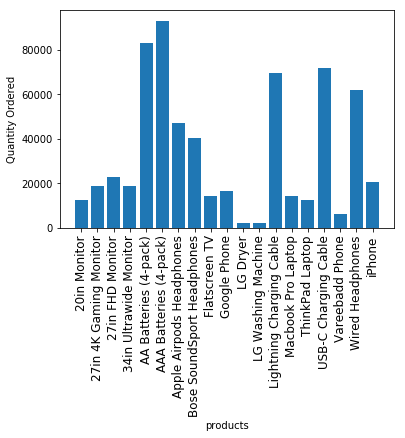

In [147]:
product_group = all_months_data.groupby('Product')
product_ordered = product_group.sum()['Quantity Ordered']

products = [product for product , df in product_group]


plt.bar(products,product_ordered)
plt.xticks(products, rotation = 'vertical', size=12)
plt.ylabel('Quantity Ordered')
plt.xlabel('products')
plt.show()

In [150]:
prices = all_months_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

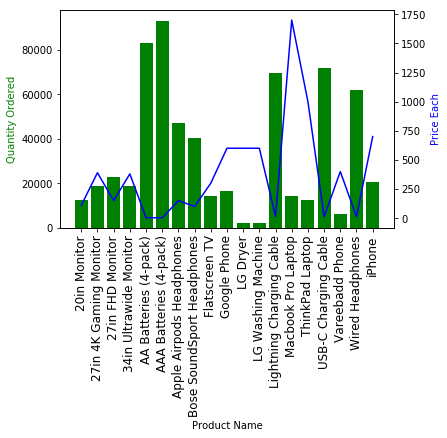

In [167]:
# show the relations between product prie and quantity orded to explain why some products are sold the most


fig,ax1 =plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,product_ordered, color='green')
ax2.plot(products, prices ,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price Each', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size=12)
plt.show()



In [ ]:
Price Each